# Activation Funcations

An activation function in a neural network is a mathematical function applied to the output of a neuron to introduce non-linearity into the model. Without an activation function, the neural network would behave like a linear model, limiting its ability to learn complex patterns from the data.

# ReLU

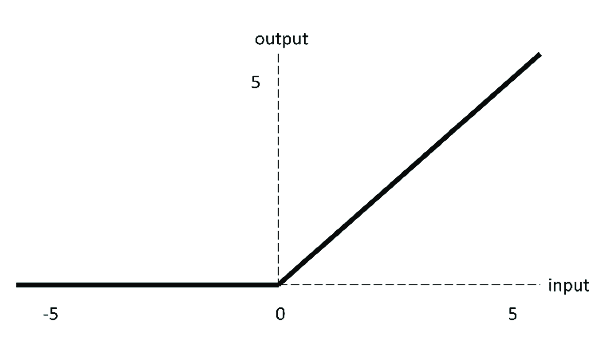

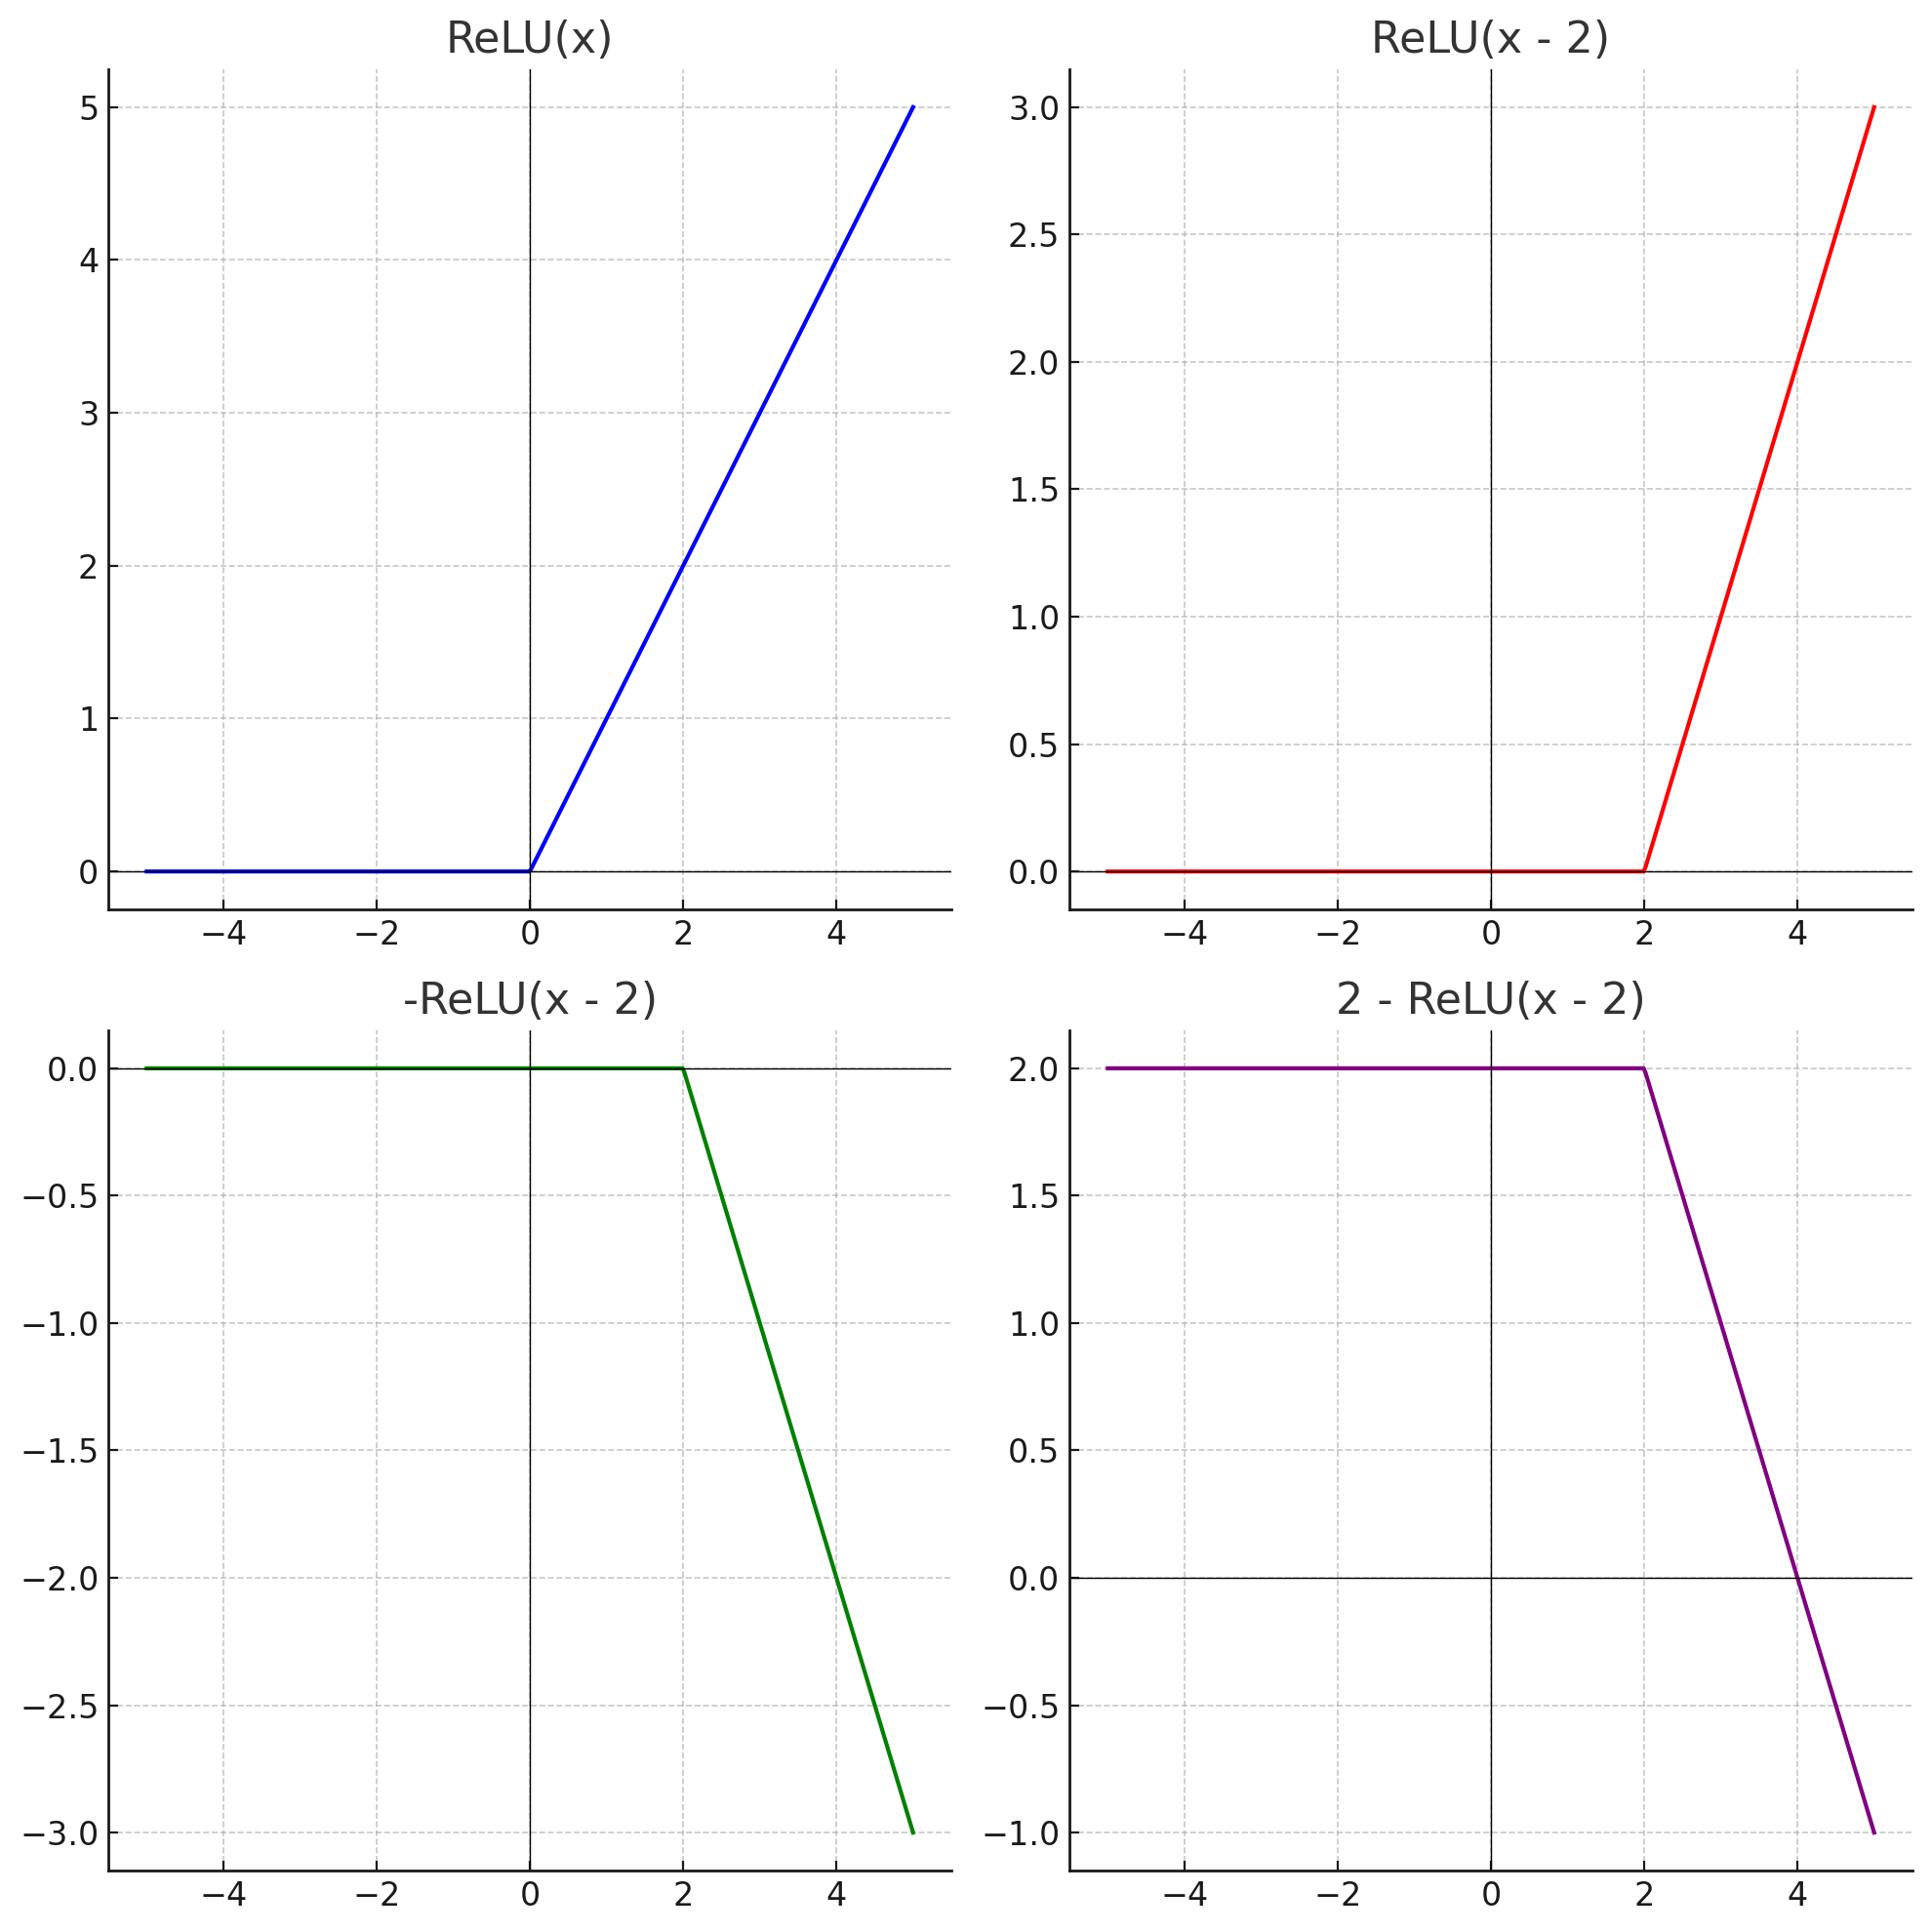

To create a triangle-like graph using ReLU functions, you can combine multiple ReLU functions by shifting and scaling them. The basic idea is to combine two ReLU functions, one with a positive slope and one with a negative slope, to form a peak (a triangle shape).

### ACTIVATION FUNCTION : RELU

In [3]:
import numpy as np
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = np.maximum(0,inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


removed all the negative value and made it zero

In [4]:
# ReLU activaton

class Activation_ReLU:
    # Forward pass
    def forward(self,inputs):
        # calculate output values from input
        self.output = np.maximum(0,inputs)
    

We typically **do not** apply the ReLU activation function at the final output layer in certain types of neural networks, particularly those dealing with **regression tasks** or **multi-class classification** problems, for the following reasons:

### 1. **ReLU in Regression Tasks**
   - **Why not use ReLU?** 
     In regression tasks, the goal of the network is to predict a continuous value (like house prices, stock values, etc.). ReLU squashes all negative values to zero, which is problematic because:
       - You could lose information: If the model’s predicted value is negative, ReLU will force it to zero, which is not desirable in regression.
       - It limits the range: The network will only be able to predict non-negative values. This might be a problem if your target output can take on both positive and negative values.
   
   - **What to use instead?**
     Usually, **no activation function** is applied at the output layer in regression tasks. The raw output of the neuron is taken as the prediction (also known as a **linear activation**).

     Example:
     - In predicting house prices, you want the output to be the full range of possible prices, so you use no activation on the final layer.

### 2. **ReLU in Classification Tasks**
   - **Why not use ReLU?**
     For classification tasks (especially multi-class classification), the output needs to represent probabilities or categorical values, and ReLU is not suitable because:
       - ReLU does not map outputs to a probability distribution. The output values can go arbitrarily large and are not constrained between 0 and 1.
       - It cannot properly handle the concept of **confidence** in predictions, which is crucial in classification tasks.
   
   - **What to use instead?**
     - **For binary classification**: Use a **sigmoid** activation function in the output layer. The sigmoid function maps the output to the range (0, 1), which is interpreted as a probability.
     - **For multi-class classification**: Use a **softmax** activation function. Softmax converts the outputs into probabilities for each class, summing to 1, which allows for interpreting the model's confidence in each class.

     Example:
     - For image classification, where the output represents the probability of different classes (like cat, dog, car), the **softmax** function is applied at the final layer.

### Summary:
- **In regression tasks**: No activation is applied at the final layer.
- **In binary classification**: A sigmoid activation is used.
- **In multi-class classification**: A softmax activation is used.
- **ReLU** is used in **hidden layers** because it helps the network learn complex patterns, but at the final layer, a suitable activation function is chosen based on the task.


# Softmax Activation Function

The **softmax activation function** is commonly used in the **output layer** of neural networks for **multi-class classification** problems. It converts raw output scores (also called logits) from the neural network into probabilities that sum to 1. This allows you to interpret the model's output as a probability distribution over different classes.

---

## Key Concepts

1. **Probability Distribution**: The softmax function converts the raw output into values between 0 and 1, which can be interpreted as probabilities for each class. The sum of these probabilities across all classes will be 1.
2. **Multi-class Classification**: Softmax is particularly useful when the task is to classify an input into one of **multiple possible classes**. For example, in digit classification (0–9), softmax assigns a probability to each possible class (digit).

---

## Softmax Formula

Given a vector \( z = [z_1, z_2, ..., z_n] \) of raw scores (logits) for each class, the softmax function for the \(i\)-th class is calculated as:

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$
Where:

- \( z_i \) is the raw score (logit) for class \(i\).
- \( e^{z_i} \) is the exponential of the raw score.
- \( \sum_{j=1}^{n} e^{z_j} \) is the sum of the exponentials of all the raw scores.
- The output is a normalized probability for class \(i\), meaning all the probabilities sum to 1.

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

## Example Calculation

Imagine you have a neural network output with three logits (raw scores) for three possible classes:

$$
z = [2.0, 1.0, 0.1]
$$

To compute the softmax probabilities:

1. **Compute exponentials**: Apply the exponential function to each of the logits.

   $$
   e^{2.0} = 7.389, \quad e^{1.0} = 2.718, \quad e^{0.1} = 1.105
   $$

2. **Sum the exponentials**: Sum all the exponentials to normalize the probabilities.

   $$
   7.389 + 2.718 + 1.105 = 11.212
   $$

3. **Divide each exponential by the sum**: Compute the softmax probabilities by dividing each exponential by the sum.


   $$
   \text{Softmax}(z_1) = \frac{7.389}{11.212} = 0.659 \quad (65.9\%)
   $$

   $$
   \text{Softmax}(z_2) = \frac{2.718}{11.212} = 0.242 \quad (24.2\%)
   $$

   $$
   \text{Softmax}(z_3) = \frac{1.105}{11.212} = 0.099 \quad (9.9\%)
   $$

---

## Properties of the Softmax Function

1. **Probabilities sum to 1**: The outputs of softmax are normalized probabilities, so the sum of the probabilities for all classes is always 1.
2. **Amplifies differences**: If one class has a much higher score (logit) than the others, softmax will assign a much higher probability to that class. This is useful for classification because the model will favor the class with the highest score.
3. **Sensitivity to differences in logits**: Small differences in logits are amplified when passed through the exponential function, making the softmax highly sensitive to relative scores.

---

## When to use Softmax

- **Multi-class classification problems**: When you need to classify an input into one of several categories (e.g., image classification into 10 categories, sentiment analysis into 3 categories: positive, neutral, negative).
- **Output layer**: Softmax is applied to the output layer of the network, as it helps interpret the raw outputs as probabilities.

---

## Difference from Sigmoid

- **Softmax** is used for multi-class classification, where the output is a probability distribution over multiple classes.
- **Sigmoid** is used for binary classification, where the output is a single probability (between 0 and 1) indicating membership in one class.

---

## Visual Intuition

Think of softmax as a way to "smoothly" assign probabilities based on the relative strengths of the logits. A higher logit will lead to a higher probability for that class, while lower logits will lead to lower probabilities.


# Implmenation

In [8]:
inputs = [[1,2,3,2.5],
          [2.,5.,-1.,2],
          [-1.5,2.7,3.3,-0.8]]


# Get unnormalized probabilites

exp_valeus = np.exp(inputs - np.max(inputs, axis = 1,keepdims=True))

# Normalize theme for each sample 

probabilites = exp_valeus / np.sum(exp_valeus, axis=1,keepdims=True)
print(probabilites)
np.sum(probabilites,axis=1)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


array([1., 1., 1.])

In [11]:
# Softmax activation 
class Acitvation_Softmax:
    # Forward pass
    def forward(self,inputs):
    # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
    # Normalize them for each sample
        probabilites = exp_values/ np.sum(exp_values,axis=1,keepdims=True)
        self.output = probabilites